In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:

df = pd.read_csv("Results.csv")
df

,question,answer,temperature,model,processor,output,score,acceptance_rate,tokens_per_sec
0,Who was the first President of the United States?,George Washington,0.8,speculative,greedy,The first President of the United States was ...,0.536563,0.509804,2.63
1,Who was the first President of the United States?,George Washington,0.8,ngram,greedy,The first President of the United States was ...,0.536563,1.000000,4.21
2,Who was the first President of the United States?,George Washington,0.8,autoregressive,greedy,The first President of the United States was ...,0.536563,NaN,6.20
3,What is 15 percent of 200?,30,0.8,speculative,greedy,"To find 15 percent of 200, you can multiply 2...",0.257718,0.377049,4.37
4,What is 15 percent of 200?,30,0.8,ngram,greedy,"To find 15 percent of 200, you can multiply 2...",0.168513,0.500000,9.74
...,...,...,...,...,...,...,...,...,...
355,What does CSS stand for?,Cascading Style Sheets,0.8,ngram,TopKwNoise,CSS stands for Cascading Style Sheets. It is ...,0.333341,0.000000,6.38
356,What does CSS stand for?,Cascading Style Sheets,0.8,autoregressive,TopKwNoise,CSS stands for Cascading Style Sheets. It is ...,0.352244,NaN,7.00
357,Which country is known for the Eiffel Tower?,France,0.8,speculative,TopKwNoise,"The Eiffel Tower is located in Paris, France....",0.364550,0.338462,4.28
358,Which country is known for the Eiffel Tower?,France,0.8,ngram,TopKwNoise,"The Eiffel Tower is located in Paris, France....",0.391242,0.625000,7.85


In [ ]:

# prepare summary tables
# 1. Average metrics by processor
processor_summary = df.groupby("processor").agg({
    "score": "mean",
    "tokens_per_sec": "mean",
    "acceptance_rate": "mean"
}).reset_index()

processor_summary

,processor,score,tokens_per_sec,acceptance_rate
0,TopKwNoise,0.445733,6.255000,0.371298
1,greedy,0.442745,6.258556,0.400863
2,multinomial,0.443208,6.167222,0.351686
3,topk,0.433513,6.275333,0.354950


In [15]:

# 2. Average metrics by model
model_summary = df.groupby("model").agg({
    "score": "mean",
    "tokens_per_sec": "mean",
    "acceptance_rate": "mean"
}).reset_index()
model_summary

,model,score,tokens_per_sec,acceptance_rate
0,autoregressive,0.442959,6.556667,NaN
1,ngram,0.439691,7.072917,0.288144
2,speculative,0.441249,5.087500,0.451254


In [16]:

# 3. Combined processor + model summary
combo_summary = df.groupby(["model", "processor"]).agg({
    "score": "mean",
    "tokens_per_sec": "mean",
    "acceptance_rate": "mean"
}).reset_index()


combo_summary

,model,processor,score,tokens_per_sec,acceptance_rate
0,autoregressive,TopKwNoise,0.447095,6.587333,NaN
1,autoregressive,greedy,0.440363,6.493333,NaN
2,autoregressive,multinomial,0.444362,6.483667,NaN
3,autoregressive,topk,0.440017,6.662333,NaN
4,ngram,TopKwNoise,0.443810,7.099000,0.302586
5,ngram,greedy,0.440320,6.978333,0.287731
6,ngram,multinomial,0.445100,7.035667,0.276147
7,ngram,topk,0.429536,7.178667,0.286111
8,speculative,TopKwNoise,0.446294,5.078667,0.440009
9,speculative,greedy,0.447552,5.304000,0.513995


/var/folders/1j/48x7yd0d57d509tlmkcqvtb40000gn/T/ipykernel_98933/2761501507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=processor_summary, x="score", y="processor", palette="viridis")


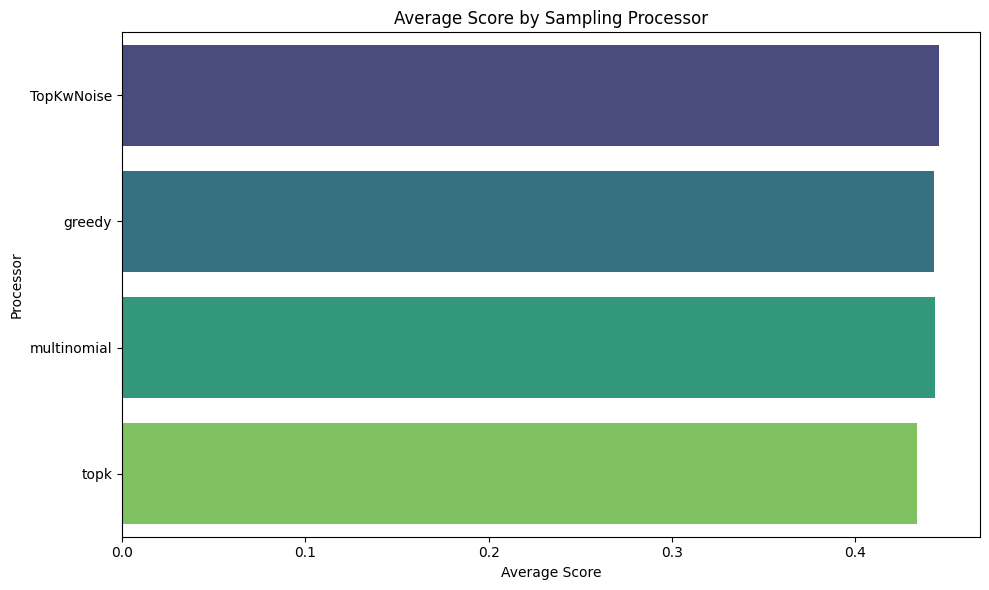

In [ ]:

# Plot 1: Score by processor
plt.figure(figsize=(10, 6))
sns.barplot(data=processor_summary, x="score", y="processor", palette="viridis")
plt.title("Average Score by Sampling Processor")
plt.xlabel("Average Score")
plt.ylabel("Processor")
plt.tight_layout()
plt.show()


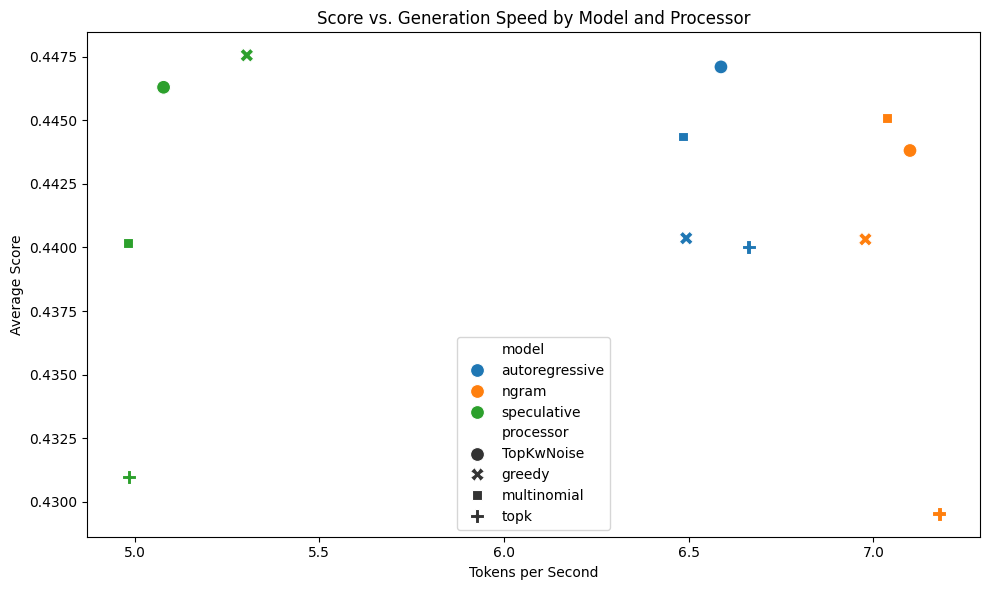

In [18]:

# Plot 2: Score vs Speed (tokens/sec) scatter by model
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combo_summary, x="tokens_per_sec", y="score", hue="model", style="processor", s=100)
plt.title("Score vs. Generation Speed by Model and Processor")
plt.xlabel("Tokens per Second")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()


/var/folders/1j/48x7yd0d57d509tlmkcqvtb40000gn/T/ipykernel_98933/614144538.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spec_proc_summary, x="acceptance_rate", y="processor", palette="coolwarm")


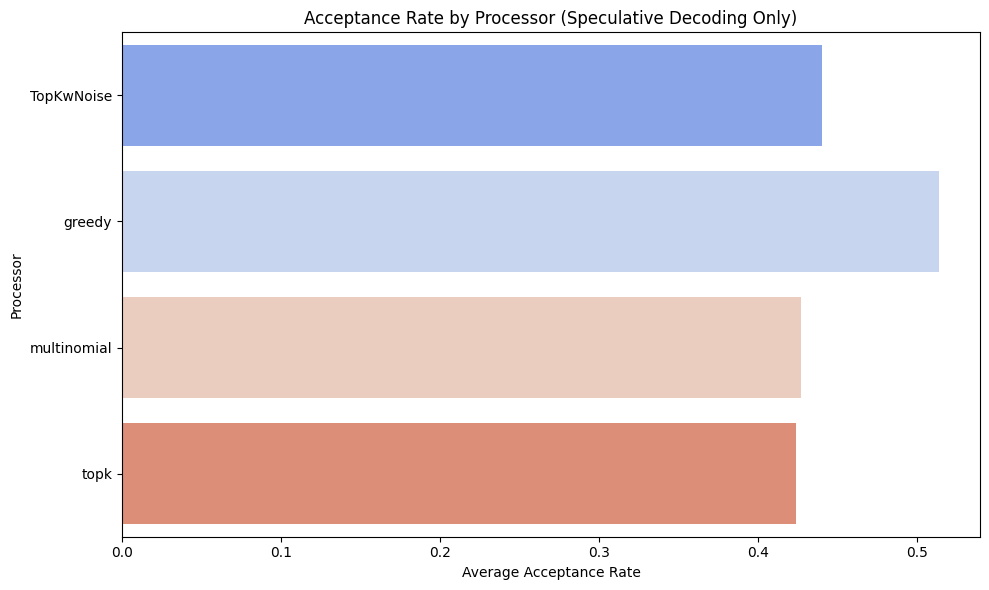

In [19]:

# Plot 3: Acceptance rate by processor (for speculative decoding only)
plt.figure(figsize=(10, 6))
speculative_only = df[df["model"] == "speculative"]
spec_proc_summary = speculative_only.groupby("processor")["acceptance_rate"].mean().reset_index()
sns.barplot(data=spec_proc_summary, x="acceptance_rate", y="processor", palette="coolwarm")
plt.title("Acceptance Rate by Processor (Speculative Decoding Only)")
plt.xlabel("Average Acceptance Rate")
plt.ylabel("Processor")
plt.tight_layout()
plt.show()


/var/folders/1j/48x7yd0d57d509tlmkcqvtb40000gn/T/ipykernel_98933/2761501507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=processor_summary, x="score", y="processor", palette="viridis")


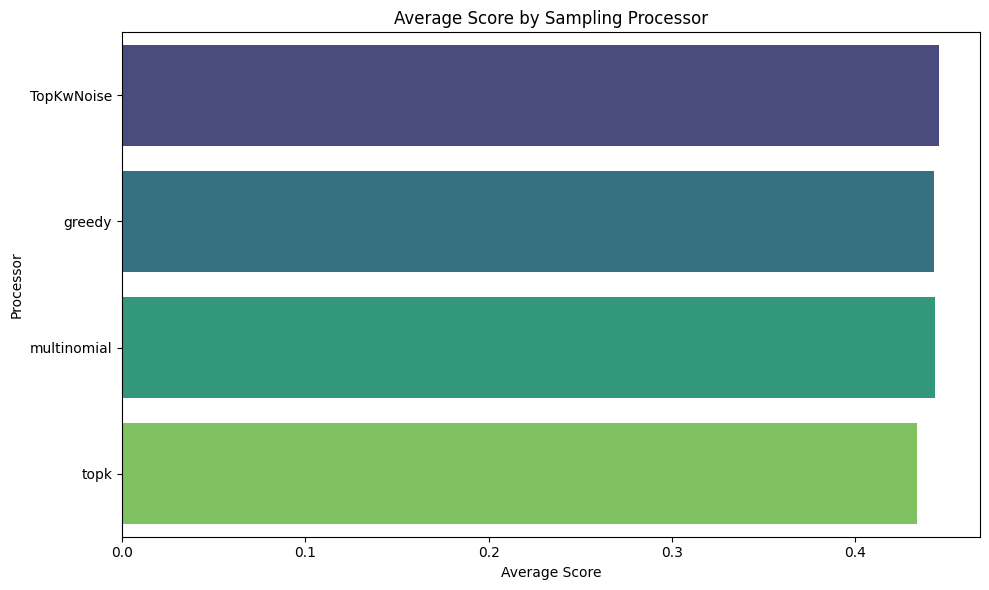

In [ ]:

# Plot 1: Score by processor
plt.figure(figsize=(10, 6))
sns.barplot(data=processor_summary, x="score", y="processor", palette="viridis")
plt.title("Average Score by Sampling Processor")
plt.xlabel("Average Score")
plt.ylabel("Processor")
plt.tight_layout()
plt.show()


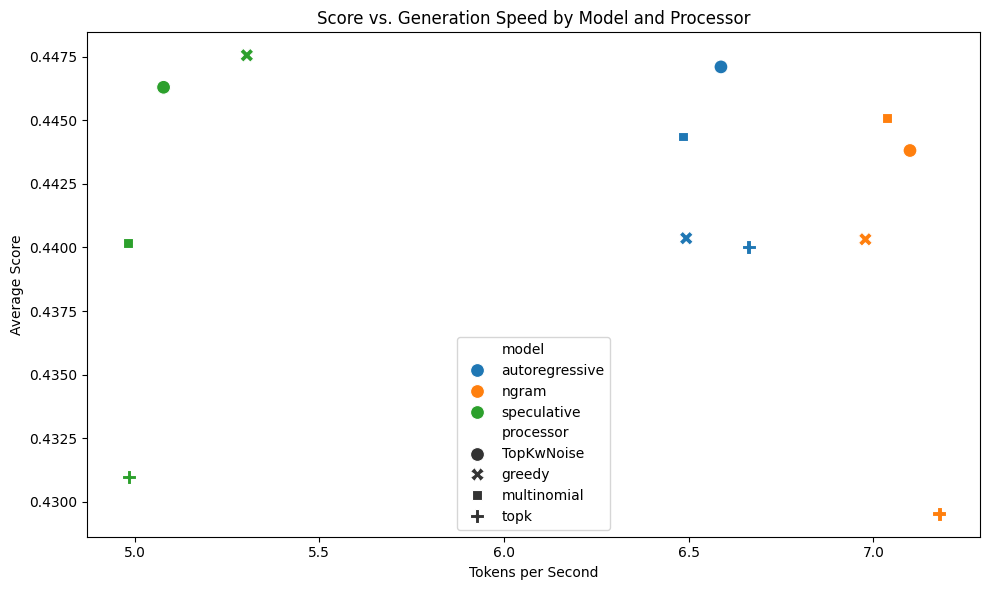

In [21]:

# Plot 2: Score vs Speed (tokens/sec) scatter by model
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combo_summary, x="tokens_per_sec", y="score", hue="model", style="processor", s=100)
plt.title("Score vs. Generation Speed by Model and Processor")
plt.xlabel("Tokens per Second")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()


/var/folders/1j/48x7yd0d57d509tlmkcqvtb40000gn/T/ipykernel_98933/614144538.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spec_proc_summary, x="acceptance_rate", y="processor", palette="coolwarm")


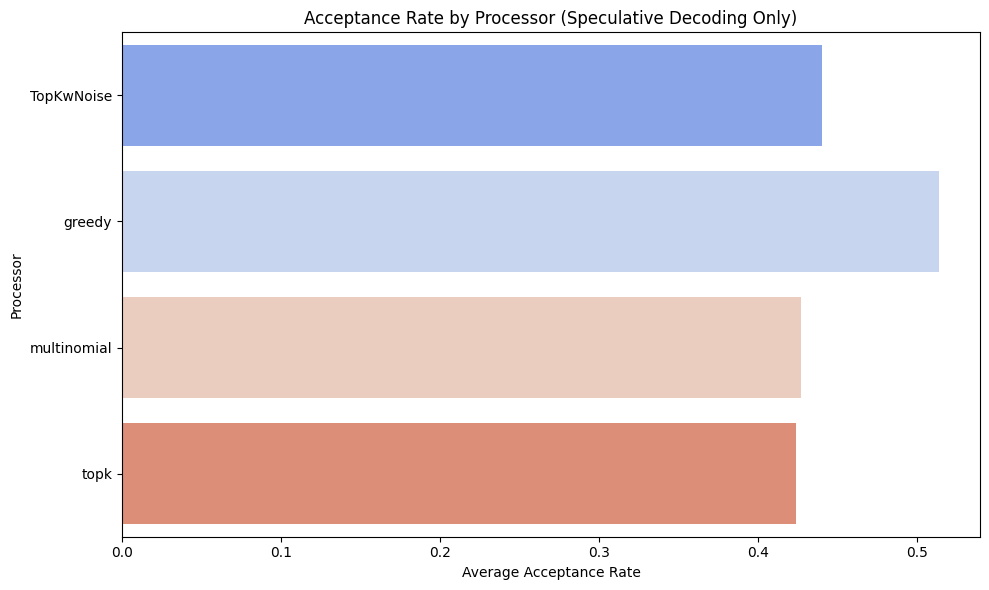

In [22]:

# Plot 3: Acceptance rate by processor (for speculative decoding only)
plt.figure(figsize=(10, 6))
speculative_only = df[df["model"] == "speculative"]
spec_proc_summary = speculative_only.groupby("processor")["acceptance_rate"].mean().reset_index()
sns.barplot(data=spec_proc_summary, x="acceptance_rate", y="processor", palette="coolwarm")
plt.title("Acceptance Rate by Processor (Speculative Decoding Only)")
plt.xlabel("Average Acceptance Rate")
plt.ylabel("Processor")
plt.tight_layout()
plt.show()


## MORE 

/var/folders/1j/48x7yd0d57d509tlmkcqvtb40000gn/T/ipykernel_98933/2147389317.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="score", y="processor", palette="magma")


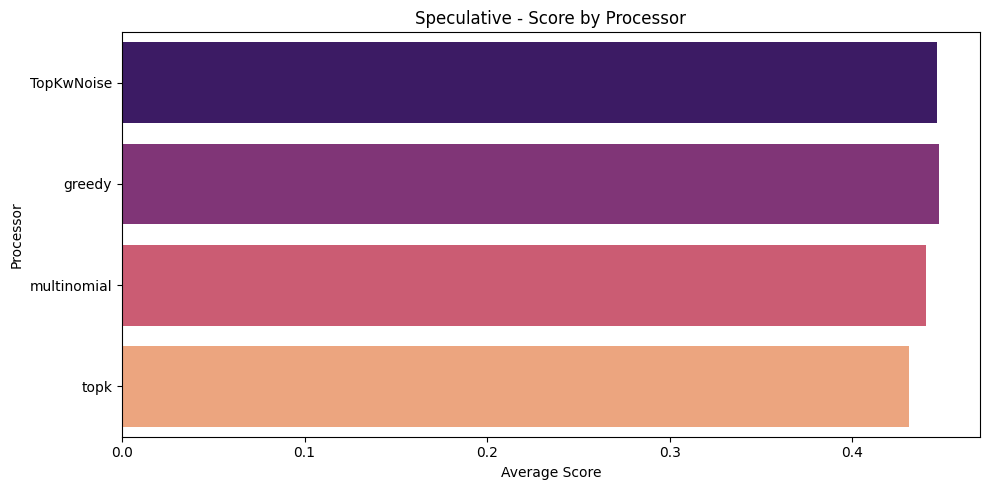

/var/folders/1j/48x7yd0d57d509tlmkcqvtb40000gn/T/ipykernel_98933/2147389317.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="tokens_per_sec", y="processor", palette="cividis")


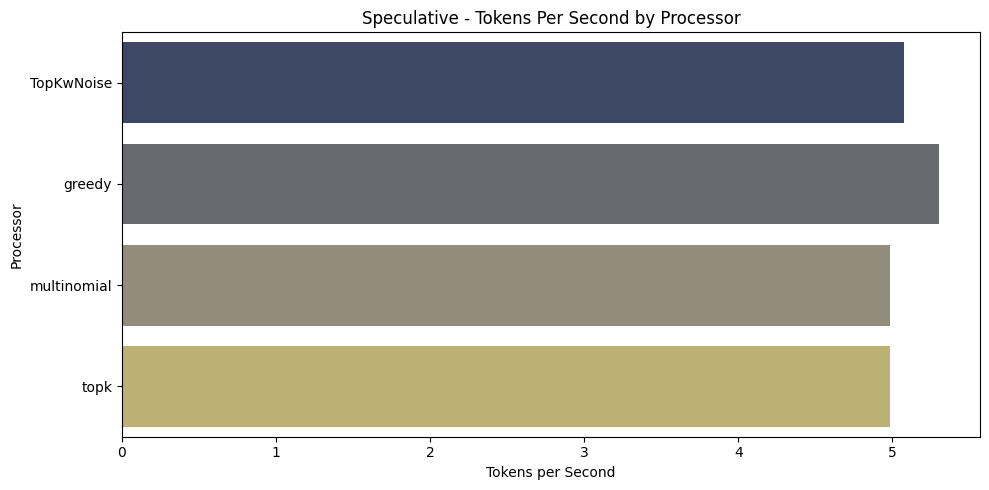

/var/folders/1j/48x7yd0d57d509tlmkcqvtb40000gn/T/ipykernel_98933/2147389317.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="acceptance_rate", y="processor", palette="coolwarm")


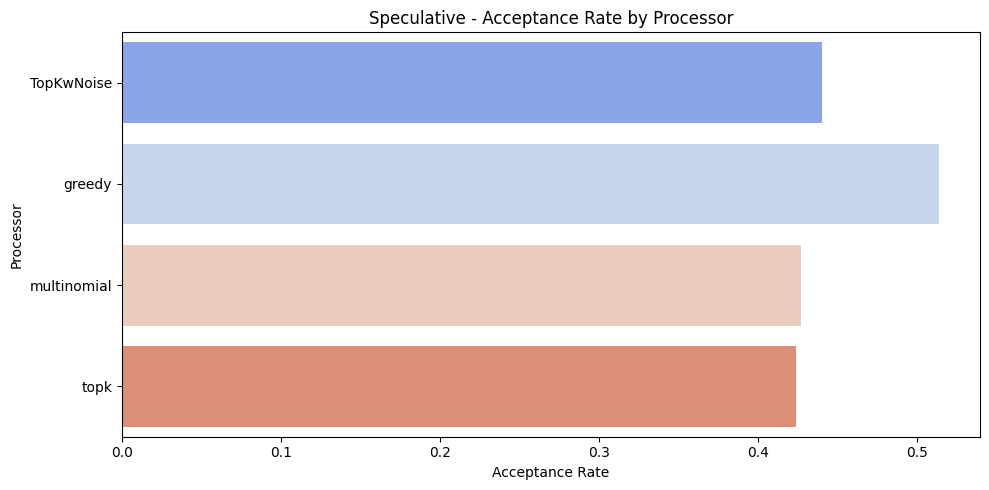

/var/folders/1j/48x7yd0d57d509tlmkcqvtb40000gn/T/ipykernel_98933/2147389317.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="score", y="processor", palette="magma")


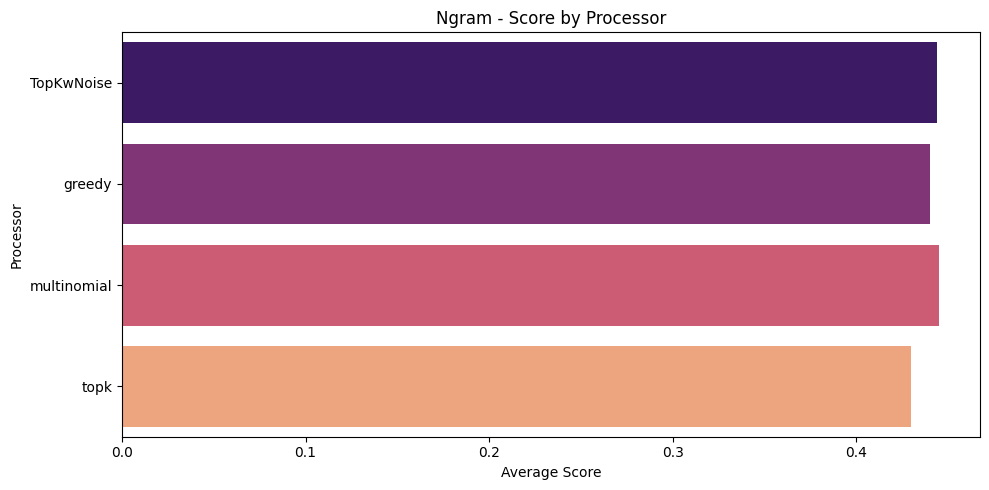

/var/folders/1j/48x7yd0d57d509tlmkcqvtb40000gn/T/ipykernel_98933/2147389317.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="tokens_per_sec", y="processor", palette="cividis")


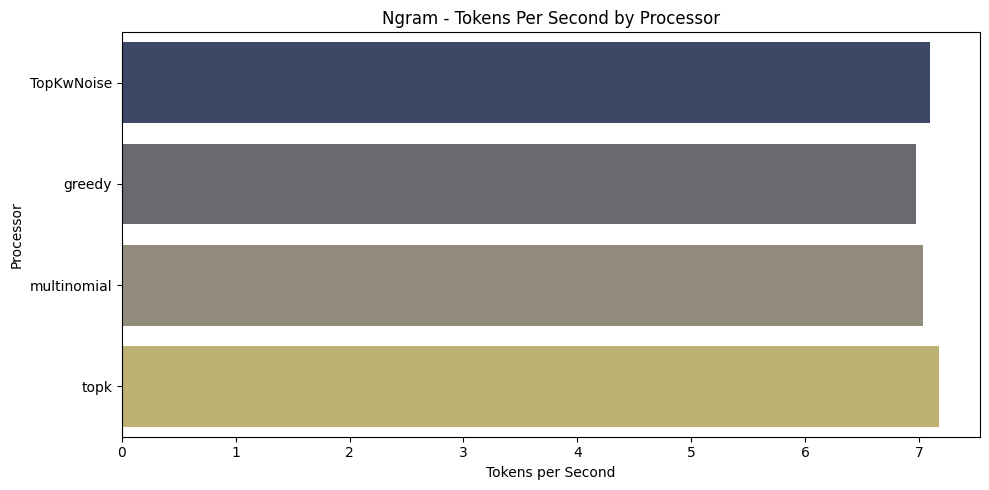

/var/folders/1j/48x7yd0d57d509tlmkcqvtb40000gn/T/ipykernel_98933/2147389317.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="score", y="processor", palette="magma")


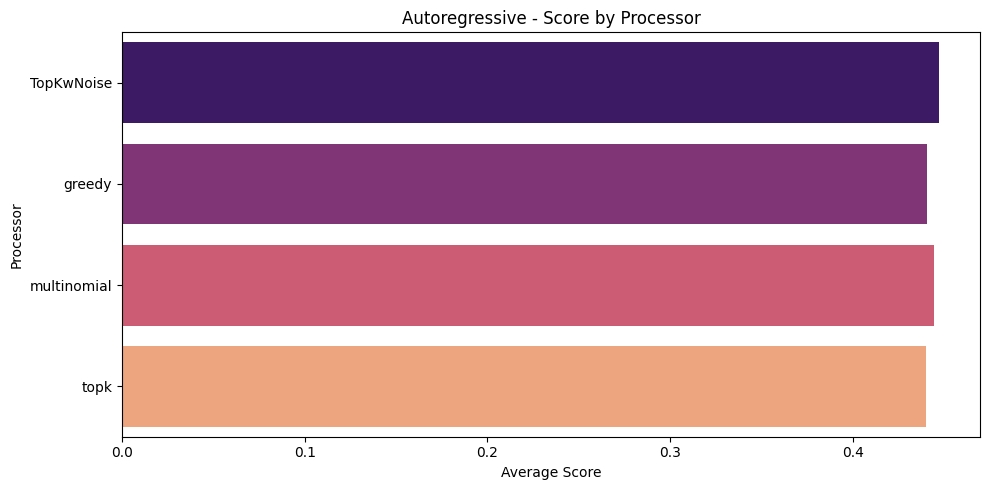

/var/folders/1j/48x7yd0d57d509tlmkcqvtb40000gn/T/ipykernel_98933/2147389317.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="tokens_per_sec", y="processor", palette="cividis")


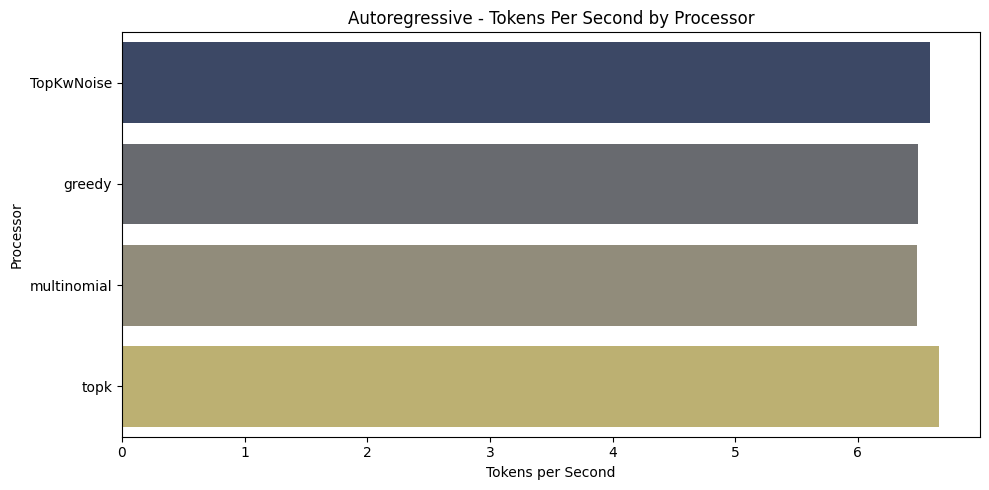

In [23]:
# Separate visual analyses per model

# Function to plot per-model breakdown
def plot_model_details(model_name):
    subset = df[df["model"] == model_name]
    summary = subset.groupby("processor").agg({
        "score": "mean",
        "tokens_per_sec": "mean",
        "acceptance_rate": "mean"
    }).reset_index()

    # Score per processor
    plt.figure(figsize=(10, 5))
    sns.barplot(data=summary, x="score", y="processor", palette="magma")
    plt.title(f"{model_name.capitalize()} - Score by Processor")
    plt.xlabel("Average Score")
    plt.ylabel("Processor")
    plt.tight_layout()
    plt.show()

    # Tokens per second
    plt.figure(figsize=(10, 5))
    sns.barplot(data=summary, x="tokens_per_sec", y="processor", palette="cividis")
    plt.title(f"{model_name.capitalize()} - Tokens Per Second by Processor")
    plt.xlabel("Tokens per Second")
    plt.ylabel("Processor")
    plt.tight_layout()
    plt.show()

    # Acceptance Rate (only for speculative)
    if model_name == "speculative":
        plt.figure(figsize=(10, 5))
        sns.barplot(data=summary, x="acceptance_rate", y="processor", palette="coolwarm")
        plt.title(f"{model_name.capitalize()} - Acceptance Rate by Processor")
        plt.xlabel("Acceptance Rate")
        plt.ylabel("Processor")
        plt.tight_layout()
        plt.show()

# Generate plots for all three models
for model in ["speculative", "ngram", "autoregressive"]:
    plot_model_details(model)
